In [1]:
%load_ext autoreload

In [2]:
%autoreload
from tracer.pymobility.models.mobility import random_waypoint
from tracer.pymobility.models.mobility import random_direction
from tracer.pymobility.models.mobility import random_walk
from tracer.pymobility.models.mobility import stochastic_walk

# Generate traces using mobility models

* Use **random waypoint** algorithm to generate random traces for $N$ users.
* The random waypoint generator creates a random point for the $N$ users.
* Iterating $C$ times this generator generates a trace of length $C$ for the $N$ users.


In [5]:
# Number of users
N = 2

# Length of traces
C = 1000

# Velocity (min, max)
V = (0.1, 0.3)

# Maximum wait time (staying at same point)
WT = 1

In [6]:
rw = random_waypoint(N, dimensions=(1, 1), velocity=V, wt_max=WT)
# rw = random_direction(N, dimensions=(1, 1), velocity=V, wt_max=WT)
# rw = random_walk(N, dimensions=(1, 1), velocity=0.05)

In [7]:
import itertools
import numpy as np

# trace = np.array(list(itertools.islice(rw, 1)))
traces = []
for i in range(C):
    traces.append(np.copy(next(rw)))

traces = np.array(traces)
traces = traces.swapaxes(0, 1)

In [12]:
print('Traces shape:', traces.shape)

Traces shape: (2, 1000, 2)


# Plot trace of a user

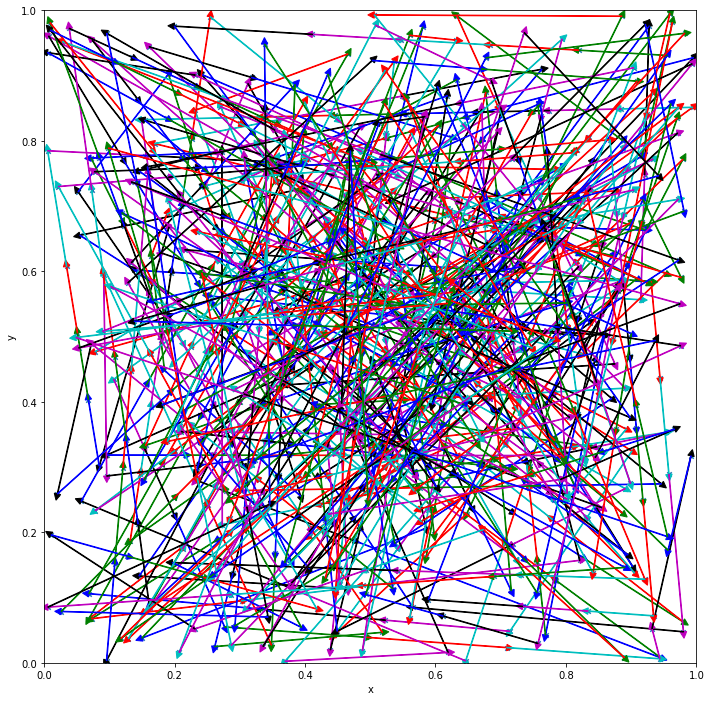

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

user_trace = traces[1]

df_trace = pd.DataFrame(user_trace, columns=['x', 'y'])
ax = df_trace.plot.scatter(
    x='x',
    y='y',
    ylim=(0, 1),
    xlim=(0, 1),
    figsize=(12, 12),
    marker='x'
)

cycol = itertools.cycle('bgrcmk')

for i in range(C - 1):
    if all(user_trace[i] == user_trace[i + 1]):
        continue
    x1, y1 = user_trace[i]
    x2, y2 = user_trace[i + 1]

    color = next(cycol)
    ax.arrow(
        x1,
        y1,
        x2 - x1,
        y2 - y1,
        head_width=0.01,
        head_length=0.01,
        fc=color,
        ec=color
    )

plt.gca().set_aspect('equal', adjustable='box')